# BT 5153: Team Loren Ipsum - Image tagging system: Electronics Category only

## Reading Datasets and importing library
* The merged data file uploaded here is a 220 MB file which was created from the original datasets downloaded from this link: https://nijianmo.github.io/amazon/index.html
* This merged file was created using 2 files downloaded from the above link: 1. The review file, which contains the review data of a product and 2. The product metadata file, which contains information about the product
    * The review file has been chosen to incorporate "realism" into our dataset. Images from review file are images that we expect from users to be uploaded onto a C2C second-hand marketplace portal

In [1]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re #for splitting tags
import urllib #Extracting images from url's
import cv2   #For image processing
import random

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#from google.colab import drive
#drive.mount('/content/drive')

/kaggle/input/mergeddata.csv


In [2]:
df = pd.read_csv('/kaggle/input/mergeddata.csv')

In [3]:
#print(df)
print(len(df))
print(df.head)

112066
<bound method NDFrame.head of               asin                                      review_images  \
0       0511189877  ['https://images-na.ssl-images-amazon.com/imag...   
1       0972683275  ['https://images-na.ssl-images-amazon.com/imag...   
2       0972683275  ['https://images-na.ssl-images-amazon.com/imag...   
3       0972683275  ['https://images-na.ssl-images-amazon.com/imag...   
4       0972683275  ['https://images-na.ssl-images-amazon.com/imag...   
...            ...                                                ...   
112061  B01HICMC3A  ['https://images-na.ssl-images-amazon.com/imag...   
112062  B01HICMC3A  ['https://images-na.ssl-images-amazon.com/imag...   
112063  B01HIS365W  ['https://images-na.ssl-images-amazon.com/imag...   
112064  B01HIW2XPM  ['https://images-na.ssl-images-amazon.com/imag...   
112065  B01HIYOC0E  ['https://images-na.ssl-images-amazon.com/imag...   

                                                 category  \
0       ['Electronics', '

## Generating and Keeping only relevant tags (using Count Vectoriser)
* We use the "category" column of the dataset above to generate tags. Tags which appear atleast 0.5% of the times across entire dataset 

In [4]:
# Data might have duplicate rows due to multiple images - creating a category dataset with unique product and category

df_cat = df[['asin','category']]
df_cat.drop_duplicates(inplace = True)
#df_cat.reset_index()
df_cat.head()

print("Unique products with their categories are:", len(df_cat))
print(df_cat)

Unique products with their categories are: 39965
              asin                                           category
0       0511189877  ['Electronics', 'Accessories & Supplies', 'Aud...
1       0972683275  ['Electronics', 'Accessories & Supplies', 'Aud...
8       106171327X  ['Electronics', 'Computers & Accessories', 'Co...
10      140053271X  ['Electronics', 'eBook Readers & Accessories',...
11      1400501466  ['Electronics', 'Computers & Accessories', 'Co...
...            ...                                                ...
112060  B01HI9ZK8M  ['Electronics', 'Accessories & Supplies', 'Aud...
112061  B01HICMC3A  ['Electronics', 'Computers & Accessories', 'Ne...
112063  B01HIS365W  ['Electronics', 'Computers & Accessories', 'Co...
112064  B01HIW2XPM  ['Electronics', 'Computers & Accessories', 'Co...
112065  B01HIYOC0E  ['Electronics', 'Accessories & Supplies', 'Cor...

[39965 rows x 2 columns]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
def my_tokenizer(s):
    #s = s.replace(', ',',') # So that blank does NOT become an encoding
    s = re.split(', ',s) #Seperate tags after each comma
    #s = s.split('/&') #Seperate tags after each &
    return s

# Replace initial and starting and '\'' characters
df_cat['category'] = df_cat['category'].apply(lambda x: x.replace('[','').replace(']','').replace('\'',''))

# Implementing vectoriser - without any 
vec = CountVectorizer(tokenizer = my_tokenizer, 
                      lowercase = True,
                      min_df = 0.005, # Should appear as a tag in atleast 0.5% of all products
                      max_features = 250,  # a maximum of top 250 tags after the above exclusion will be considered,
                      stop_words = ['electronics'] #THIS STOP-WORD WOULD NOT BE USED ONCE EXPANDING ONTO OTHER CATEGORIES
                     )
X = vec.fit_transform(df_cat['category'])
tags = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(tags.head())
print("~2100 individual tags are now reduced to: ",tags.shape)
                   
## Joining tags to df_cat
df_vectoriser = pd.concat([df_cat.reset_index(drop=True),tags.reset_index(drop=True)], axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


   accessories  accessories & supplies  adapters  amplifiers  antennas  \
0            0                       1         0           0         0   
1            0                       1         0           0         0   
2            0                       0         0           0         0   
3            0                       0         0           0         0   
4            0                       0         0           0         0   

   audio & video accessories  audio cables  backpacks  bags  bags & cases  \
0                          1             0          0     0             0   
1                          1             0          0     0             0   
2                          0             0          0     0             0   
3                          0             0          0     0             0   
4                          0             0          0     0             0   

   ...  tv accessories & parts  tv ceiling & wall mounts  usb cables  \
0  ...              

In [6]:
## Viewing concat dataset
df_vectoriser

,asin,category,accessories,accessories & supplies,adapters,amplifiers,antennas,audio & video accessories,audio cables,backpacks,...,tv accessories & parts,tv ceiling & wall mounts,usb cables,usb flash drives,vehicle electronics accessories,video,video cables,video projectors,video surveillance,wearable technology
0,0511189877,"Electronics, Accessories & Supplies, Audio & V...",0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0972683275,"Electronics, Accessories & Supplies, Audio & V...",0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,106171327X,"Electronics, Computers & Accessories, Computer...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,140053271X,"Electronics, eBook Readers & Accessories, eBoo...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400501466,"Electronics, Computers & Accessories, Computer...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39960,B01HI9ZK8M,"Electronics, Accessories & Supplies, Audio & V...",0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39961,B01HICMC3A,"Electronics, Computers & Accessories, Networki...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39962,B01HIS365W,"Electronics, Computers & Accessories, Computer...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39963,B01HIW2XPM,"Electronics, Computers & Accessories, Computer...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building model

In [7]:
# Libraries for building model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

Using TensorFlow backend.


### Some more data manipulation (Sequential steps)
* This is done because each row has multiple URL's of images, so each URL becomes 1 row of data
* Only keep products which have >1 "metadata" images - this check is introduced to ensure that products are genuine and the seller has put some effort to list the image online
* Randomly selecting 2 images from metadata and 1 image from the review data: This is done because downloading just all the review images takes 5+ hours

In [62]:
# We have observed multiple review Url's for 1 product, so dataset is exploded such that each URL becomes a row
df_url1 = df[['asin','review_images']]
df_url1 = df_url1.drop_duplicates().reset_index(drop = True)
df_url2 = df[['asin','clean_image']]
df_url2 = df_url2.drop_duplicates().reset_index(drop = True)
url_clean1 = lambda x: x['review_images'].replace('\'','').replace('[','').replace(']','')
url_clean2 = lambda x: x['clean_image'].replace('\'','').replace('[','').replace(']','')
df_url1['clean_review_url'] = df_url1.apply(url_clean1, axis = 1)
df_url2['clean_metadata_url'] = df_url2.apply(url_clean2, axis = 1)
new_df1 = pd.DataFrame(df_url1.clean_review_url.str.split(', ').tolist(), index=df_url1.asin).stack()  
new_df2 = pd.DataFrame(df_url2.clean_metadata_url.str.split(', ').tolist(), index=df_url2.asin).stack()
#print(new_df2)
new_df1 = new_df1.reset_index([0, 'asin'])
new_df1.columns = ['asin', 'image']
new_df2 = new_df2.reset_index([0, 'asin'])
new_df2.columns = ['asin', 'image']
#print(new_df2[new_df2.asin == 'B01HJDNL60'])

In [63]:
# Checking for products which have only 1 metadata image
counts = pd.DataFrame(new_df2.asin.value_counts().reset_index(drop = False))
counts_selected = counts[counts.asin > 1]
print(counts_selected)
asin_selected = counts_selected['index']

            index  asin
0      B00OJZ4Y40    50
1      B00VHOAWX8    50
2      B00UGH997M    50
3      B00H0LJ6HA    50
4      B00J9M8Z8Y    50
...           ...   ...
36502  B01AV59DZG     2
36503  B00AO7DC9K     2
36504  B011IH6TYE     2
36505  B00GTES602     2
36506  B00O7Z52CU     2

[36507 rows x 2 columns]


In [64]:
# Filtering for products with atleast 2 metadata images
new_df1 = new_df1[new_df1.asin.isin(asin_selected)]
new_df2 = new_df2[new_df2.asin.isin(asin_selected)]

## Randomly sampling 2 images for a product from metadata and 1 image from review data
grouped_1 = new_df1.groupby('asin')
new_df1_group = grouped_1.apply(lambda x: x.sample(n=1, replace = False))
new_df1_group = new_df1_group[['asin','image']].reset_index(drop = True)
grouped_2 = new_df2.groupby('asin')
new_df2_group = grouped_2.apply(lambda x: x.sample(n=2, replace = False))
new_df2_group = new_df2_group[['asin','image']].reset_index(drop = True)

new_df = pd.concat([new_df1_group, new_df2_group])
print(new_df)

             asin                                              image
0      0972683275  https://images-na.ssl-images-amazon.com/images...
1      1400501466  https://images-na.ssl-images-amazon.com/images...
2      1616825375  https://images-na.ssl-images-amazon.com/images...
3      1935009192  https://images-na.ssl-images-amazon.com/images...
4      6073894996  https://images-na.ssl-images-amazon.com/images...
...           ...                                                ...
73009  B01HIW2XPM  https://images-na.ssl-images-amazon.com/images...
73010  B01HJ8E11E  https://images-na.ssl-images-amazon.com/images...
73011  B01HJ8E11E  https://images-na.ssl-images-amazon.com/images...
73012  B01HJDNL60  https://images-na.ssl-images-amazon.com/images...
73013  B01HJDNL60  https://images-na.ssl-images-amazon.com/images...

[109521 rows x 2 columns]


In [143]:
## Merging our tags dataset with the above created data to obtain final dataset
df_model = new_df.merge(df_vectoriser, how = 'left',on = 'asin')
print(df_model.head())
print(df_model.shape)

         asin                                              image  \
0  0972683275  https://images-na.ssl-images-amazon.com/images...   
1  1400501466  https://images-na.ssl-images-amazon.com/images...   
2  1616825375  https://images-na.ssl-images-amazon.com/images...   
3  1935009192  https://images-na.ssl-images-amazon.com/images...   
4  6073894996  https://images-na.ssl-images-amazon.com/images...   

                                            category  accessories  \
0  Electronics, Accessories & Supplies, Audio & V...            0   
1  Electronics, Computers & Accessories, Computer...            0   
2   Electronics, eBook Readers & Accessories, Covers            0   
3  Electronics, eBook Readers & Accessories, Read...            0   
4  Electronics, Computers & Accessories, Computer...            0   

   accessories & supplies  adapters  amplifiers  antennas  \
0                       1         0           0         0   
1                       0         0           0       

In [83]:
# create funtion to generate an image from URL and plot it
def show_image_from_url(image_url):

  """
  Fetches image online from the image_url and plots it as it is using matplotlib's pyplot's image show
  """
  image_url = image_url.replace('\'','').replace('[','').replace(']','')
  #for url in image_url:
  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)#, plt.axis('off')

In [84]:
# Ploting multiple review images of same object
counts = df_model.asin.value_counts()
counts

B0147YFM9I    3
B00RPJON8E    3
B00U0WUGXO    3
B001EQ4C8U    3
B00JXRYBX8    3
             ..
B003VQQVB2    3
B017GQGUAE    3
B014LGK1P2    3
B00SUQD4JK    3
B004WB8EYM    3
Name: asin, Length: 36507, dtype: int64

['https://images-na.ssl-images-amazon.com/images/I/81IBF4sqyUL._SY88.jpg'
 'https://images-na.ssl-images-amazon.com/images/I/514FRJXj0gL._SS40_.jpg'
 'https://images-na.ssl-images-amazon.com/images/I/41AOxhVSevL._SS40_.jpg']
Category of the image is:  Electronics, Camera & Photo, Accessories, Remote Controls


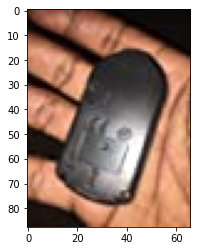

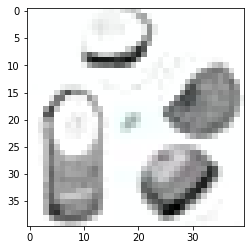

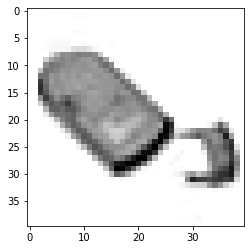

In [85]:
# Plotting multiple images for object B004WB8EYM
obj_image = df_model.loc[df_model.asin == 'B004WB8EYM'].reset_index(drop = True)
#print(obj_image)
# Ensuring links are different 
print(obj_image.image.values)
print("Category of the image is: ", obj_image['category'].loc[0])
i = 0
for i in range(3):
    plt.figure()
    show_image_from_url(obj_image['image'].loc[i])

### Some problems with using just review data - review images for camera is people putting in random "clicked" photos

In [97]:
# Ploting multiple review images of same object
counts = new_df1.asin.value_counts()
counts

B00X8MRBCW    331
B00I8BICCG    271
B00U2W4JEY    238
B005MTMFHU    233
B00DIF2BO2    220
             ... 
B0080NQD14      1
B012F7NSFY      1
B003BNJN9W      1
B01D03M29K      1
B00RHI7LN2      1
Name: asin, Length: 36507, dtype: int64

In [127]:
df.loc[df.asin == 'B00X8MRBCW']['category'].head(1).values

array(["['Electronics', 'Camera & Photo', 'Lenses', 'Camera Lenses', 'SLR Camera Lenses']"],
      dtype=object)

Category of the image is:  ["['Electronics', 'Camera & Photo', 'Lenses', 'Camera Lenses', 'SLR Camera Lenses']"]


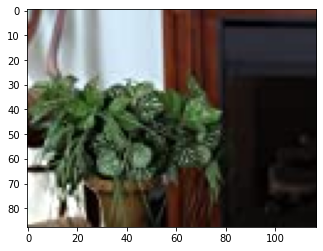

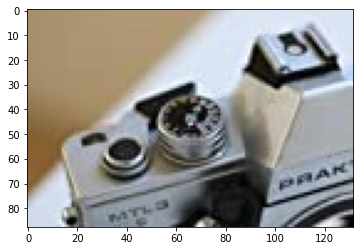

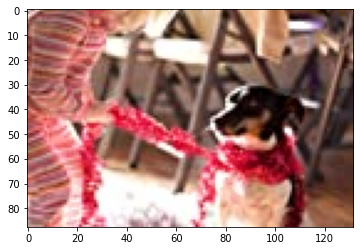

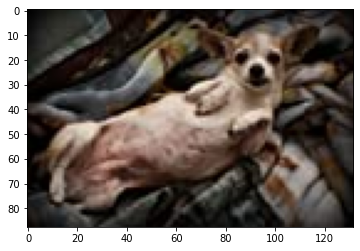

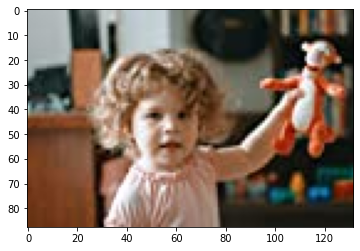

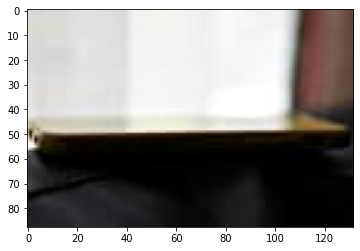

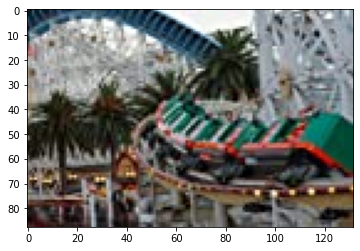

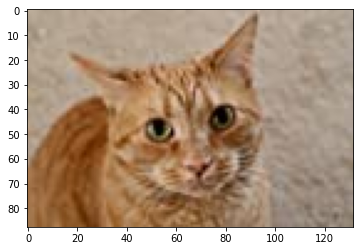

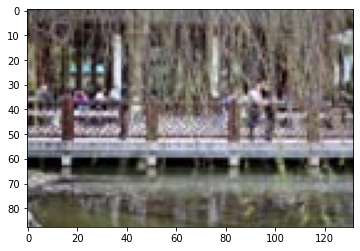

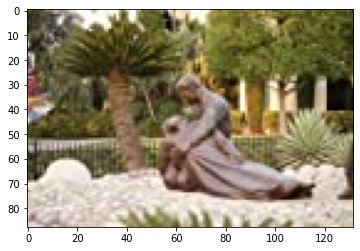

In [128]:
### THIS PART SHOWS THE PROBLEMS WITH SOME PRODUCTS - SUCH AS CAMERA PHOTOS BEING RANDOMLY TAKEN PHOTOS
# Plotting images for object B00007E7JU
obj_image = new_df1.loc[new_df1.asin == 'B00X8MRBCW'].reset_index(drop = True)
#print(obj_image)
print("Category of the image is: ", df.loc[df.asin == 'B00X8MRBCW']['category'].head(1).values)
for i in range(10):
    plt.figure()
    #print(obj_image['image'].values)
    show_image_from_url(obj_image['image'].loc[random.randint(0,len(obj_image)-1)])

### Getting arrays for images out

In [173]:
#create function to obtain image data and convert into generator
def get_image_data(img_url):
    #url_list = url_list.replace('\'','').replace('[','').replace(']','').split(',')
    #img_list = []
    #print(len(url_list))

    #Download from image url and import it as a numpy array
    response = urllib.request.urlopen(img_url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    #print(1)
    #print(image.shape)
    #Read the numpy arrays as color images in OpenCV
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
    #image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    #print(image_bgr.shape)
    #Resize the image to 35x35x3 pixels size - review images are much bigger -> but they have been converted as well 
    if image.shape[0]> 1000:
        image = cv2.resize(image_bgr, (35, 35))
    else:
        image = np.nan
    #img_list.append(image)
    return image

In [174]:
# Applying Image generator
#df_model['loaded_img'] = df_model['image'].apply(get_image_data)

# Testing for top 500 images - start: 01:27, end: 
df_test = df_model.loc[:500,]
df_test['loaded_img'] = df_test['image'].apply(get_image_data)

# Removing the entries with missing images
df_test_final = df_test.dropna(how = 'any')
df_test_final.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
df_input = df_test
df_input.drop(columns = ['asin','category','image'], axis = 1, inplace = True)
df_input.columns

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['accessories', 'accessories & supplies', 'adapters', 'amplifiers',
       'antennas', 'audio & video accessories', 'audio cables', 'backpacks',
       'bags', 'bags & cases',
       ...
       'tv ceiling & wall mounts', 'usb cables', 'usb flash drives',
       'vehicle electronics accessories', 'video', 'video cables',
       'video projectors', 'video surveillance', 'wearable technology',
       'loaded_img'],
      dtype='object', length=116)

### Building model

In [177]:
# Inspiration for this architecture: VGG neural network

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(35,35, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(tags.shape[1], activation='sigmoid')) # output layer = number of tags

In [178]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [198]:
n = len(df_input) #Size of data
dataset = df_input[['loaded_img']]
y = df_input.drop('loaded_img',axis = 1)
model.fit(np.array(dataset[:n]), np.array(y[:n]), batch_size=16, epochs=5,
          verbose=1, validation_split=0.1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [196]:
np.array(dataset[:n])[5].shape

(500,)

### Cleaning tags to arrive at relevant tags for each product

In [ ]:
# The above process takes a lot of time, so a csv file has been exported for tags
#df_labels = pd.read_csv('/kaggle/input/data_labels.csv')

In [ ]:
# Checking for most frequently occuring labels
plt

In [0]:

#!cp data_labels.csv "drive/My Drive/"